In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load the data you saved at the end of Task 1
df = pd.read_csv('../data/processed/balanced.csv')

# Separate features (X) and target (y)
X = df.select_dtypes(include=['number']).drop(columns=['class'], errors='ignore')
y = df['class']

# 1. Look at your columns to see which ones are strings/dates
print(df.dtypes)


purchase_value     float64
age                float64
class              float64
hour_of_day        float64
time_diff          float64
source_Ads         float64
source_Direct      float64
source_SEO         float64
browser_Chrome     float64
browser_FireFox    float64
browser_IE         float64
browser_Opera      float64
browser_Safari     float64
sex_F              float64
sex_M              float64
dtype: object


In [25]:
# Check the counts in the whole file
print("--- Total Data Balance ---")
print(df['class'].value_counts())

--- Total Data Balance ---
class
0.0    14151
1.0    14151
Name: count, dtype: int64


In [26]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 22641 samples
Testing set: 5661 samples


In [27]:
# Check the counts in your Training set
print("--- Training Set Balance ---")
print(y_train.value_counts())

# Check the counts in your Testing set
print("--- Testing Set Balance ---")
print(y_test.value_counts())

--- Training Set Balance ---
class
1.0    11321
0.0    11320
Name: count, dtype: int64
--- Testing Set Balance ---
class
0.0    2831
1.0    2830
Name: count, dtype: int64


In [28]:
# 1. Initialize the model
lr_model = LogisticRegression(max_iter=1000)

# 2. Train the model
lr_model.fit(X_train, y_train)

# 3. Make predictions
y_pred = lr_model.predict(X_test)

print("Model training complete!")


Model training complete!


Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.65      0.67      2831
         1.0       0.67      0.71      0.69      2830

    accuracy                           0.68      5661
   macro avg       0.68      0.68      0.68      5661
weighted avg       0.68      0.68      0.68      5661



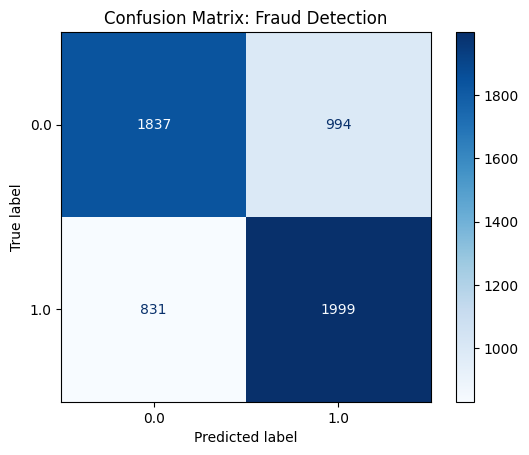

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay

# 1. Print the text report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 2. Visual Check: Confusion Matrix
# This shows how many frauds were missed vs. caught
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix: Fraud Detection')
plt.show()

In [30]:
from sklearn.ensemble import RandomForestClassifier

# 1. Initialize the Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Train the model
rf_model.fit(X_train, y_train)

# 3. Make predictions
y_pred_rf = rf_model.predict(X_test)

# 4. Check the results
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

Random Forest Results:
              precision    recall  f1-score   support

         0.0       0.69      0.90      0.78      2831
         1.0       0.86      0.59      0.70      2830

    accuracy                           0.75      5661
   macro avg       0.77      0.75      0.74      5661
weighted avg       0.77      0.75      0.74      5661



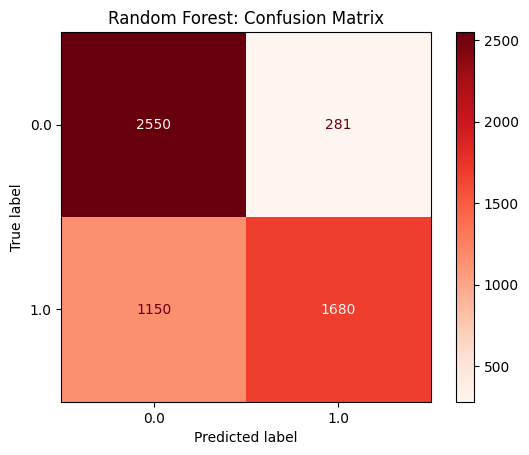

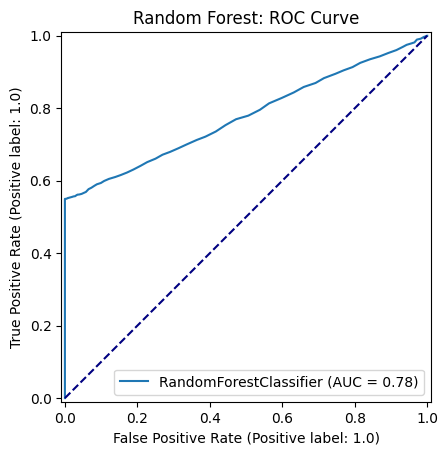

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

# 1. Plot Confusion Matrix
# This shows exactly how many frauds were caught vs missed
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='Reds')
plt.title('Random Forest: Confusion Matrix')
plt.show()

# 2. Plot ROC Curve
# This shows the "strength" of the model. The closer the line is to the top-left, the better!
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--') # Diagonal line for reference
plt.title('Random Forest: ROC Curve')
plt.show()

XGBoost Results:
              precision    recall  f1-score   support

         0.0       0.69      0.99      0.81      2831
         1.0       0.98      0.55      0.71      2830

    accuracy                           0.77      5661
   macro avg       0.84      0.77      0.76      5661
weighted avg       0.84      0.77      0.76      5661



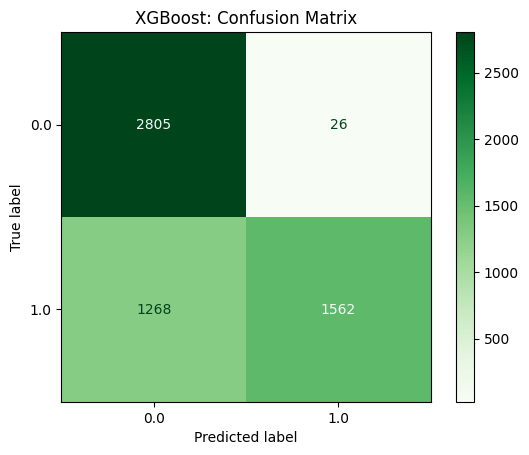

In [33]:
from xgboost import XGBClassifier

# 1. Initialize XGBoost
# We use a few settings to help it focus on the tricky cases
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# 2. Train the model
xgb_model.fit(X_train, y_train)

# 3. Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# 4. Check the results
print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))

# 5. Plot the Confusion Matrix to see if that '1150' number goes down
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test, cmap='Greens')
plt.title('XGBoost: Confusion Matrix')
plt.show()

In [34]:
# 1. Get the probabilities instead of just 1s and 0s
y_probs = xgb_model.predict_proba(X_test)[:, 1]

# 2. Lower the threshold to 0.3 (flag it if it's 30% likely to be fraud)
y_pred_brave = (y_probs >= 0.3).astype(int)

# 3. See the results
print("Brave XGBoost Results (Threshold 0.3):")
print(classification_report(y_test, y_pred_brave))

Brave XGBoost Results (Threshold 0.3):
              precision    recall  f1-score   support

         0.0       0.69      0.36      0.47      2831
         1.0       0.57      0.84      0.68      2830

    accuracy                           0.60      5661
   macro avg       0.63      0.60      0.57      5661
weighted avg       0.63      0.60      0.57      5661



Neural Network (ANN) Results:
              precision    recall  f1-score   support

         0.0       0.69      1.00      0.82      2831
         1.0       1.00      0.55      0.71      2830

    accuracy                           0.77      5661
   macro avg       0.84      0.77      0.76      5661
weighted avg       0.84      0.77      0.76      5661



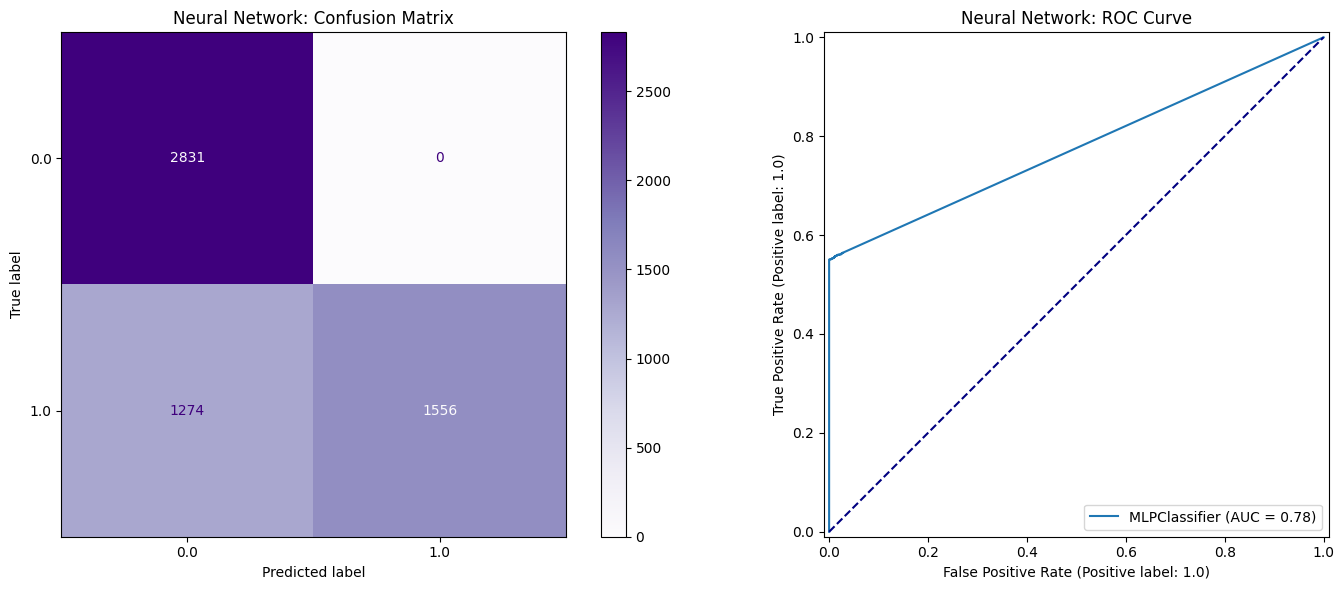

In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt

# 1. Initialize and Train the "Brain"
# We use 'alpha' to keep the model from over-thinking (overfitting)
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, alpha=0.001, random_state=42)
mlp_model.fit(X_train, y_train)

# 2. Make predictions
y_pred_mlp = mlp_model.predict(X_test)

# 3. Print the numbers
print("Neural Network (ANN) Results:")
print(classification_report(y_test, y_pred_mlp))

# 4. PLOTTING THE GRAPHS
# Create a figure with two side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Confusion Matrix (The Hits and Misses)
ConfusionMatrixDisplay.from_estimator(mlp_model, X_test, y_test, cmap='Purples', ax=ax1)
ax1.set_title('Neural Network: Confusion Matrix')

# Plot 2: ROC Curve (The Strength Curve)
RocCurveDisplay.from_estimator(mlp_model, X_test, y_test, ax=ax2)
ax2.plot([0, 1], [0, 1], color='navy', linestyle='--')
ax2.set_title('Neural Network: ROC Curve')

plt.tight_layout()
plt.show()

[LightGBM] [Info] Number of positive: 11321, number of negative: 11320
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 449
[LightGBM] [Info] Number of data points in the train set: 22641, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500022 -> initscore=0.000088
[LightGBM] [Info] Start training from score 0.000088
LightGBM Results:
              precision    recall  f1-score   support

         0.0       0.69      0.99      0.81      2831
         1.0       0.97      0.55      0.71      2830

    accuracy                           0.77      5661
   macro avg       0.83      0.77      0.76      5661
weighted avg       0.83      0.77      0.76      5661



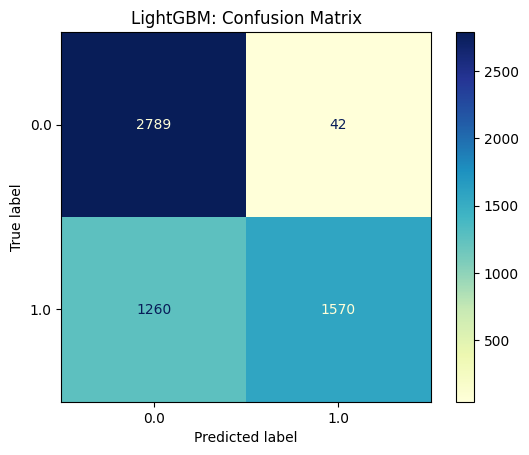

In [38]:
import lightgbm as lgb
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Initialize LightGBM
# We use 'is_unbalance=False' because we already balanced the data ourselves
lgbm_model = lgb.LGBMClassifier(random_state=42)

# 2. Train the model
lgbm_model.fit(X_train, y_train)

# 3. Predict
y_pred_lgbm = lgbm_model.predict(X_test)

# 4. Results
print("LightGBM Results:")
print(classification_report(y_test, y_pred_lgbm))

# 5. Plotting the Confusion Matrix
ConfusionMatrixDisplay.from_estimator(lgbm_model, X_test, y_test, cmap='YlGnBu')
plt.title('LightGBM: Confusion Matrix')
plt.show()

In [39]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Create the 5-fold checker
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Run the check
cv_scores = cross_val_score(lgbm_model, X, y, cv=skf, scoring='f1')

print(f"LGBM Reliability Check (F1-Scores): {cv_scores}")
print(f"Average Reliability: {cv_scores.mean():.2f}")
print(f"Stability (Std Dev): {cv_scores.std():.2f}")

[LightGBM] [Info] Number of positive: 11321, number of negative: 11320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002807 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451
[LightGBM] [Info] Number of data points in the train set: 22641, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500022 -> initscore=0.000088
[LightGBM] [Info] Start training from score 0.000088
[LightGBM] [Info] Number of positive: 11320, number of negative: 11321
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451
[LightGBM] [Info] Number of data points in the train set: 22641, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499978 -> initscore=-0.000088
[LightGBM] [Info] Start training from score -0.000088
[LightGBM] [Info

In [40]:
from sklearn.model_selection import GridSearchCV

# 1. Define the "Knobs" we want to turn
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1]
}

# 2. Set up the Search
# This will try every combination to find the best one for 'f1' (balance)
grid_search = GridSearchCV(estimator=lgbm_model, param_grid=param_grid, cv=3, scoring='f1')

# 3. Run the search
grid_search.fit(X_train, y_train)

# 4. See the best settings
print("Best Settings Found:", grid_search.best_params_)

# 5. Use the best version to predict
best_lgbm = grid_search.best_estimator_
y_pred_best = best_lgbm.predict(X_test)

print("\nTuned LightGBM Results:")
print(classification_report(y_test, y_pred_best))

[LightGBM] [Info] Number of positive: 7548, number of negative: 7546
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003677 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 15094, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500066 -> initscore=0.000265
[LightGBM] [Info] Start training from score 0.000265
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [43]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# 1. Create a list of all 5 models we've built
# (Make sure these variable names match what you used in your notebook)
models = [
    ('Logistic Regression', lr_model),
    ('Random Forest', rf_model),
    ('XGBoost', xgb_model),
    ('LightGBM', lgbm_model),
    ('Neural Network', mlp_model)
]

# 2. Set up the 5-fold checker
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("--- Final Reliability Check (F1-Scores) ---")
for name, model in models:
    # This runs the model 5 times on different "slices" of your data
    scores = cross_val_score(model, X, y, cv=skf, scoring='f1')
    print(f"{name}:")
    print(f"   Average Score: {scores.mean():.3f}")
    print(f"   Stability (Std Dev): {scores.std():.3f}")
    print("-" * 30)

--- Final Reliability Check (F1-Scores) ---
Logistic Regression:
   Average Score: 0.682
   Stability (Std Dev): 0.006
------------------------------
Random Forest:
   Average Score: 0.694
   Stability (Std Dev): 0.004
------------------------------
XGBoost:
   Average Score: 0.698
   Stability (Std Dev): 0.005
------------------------------
[LightGBM] [Info] Number of positive: 11321, number of negative: 11320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005648 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451
[LightGBM] [Info] Number of data points in the train set: 22641, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500022 -> initscore=0.000088
[LightGBM] [Info] Start training from score 0.000088
[LightGBM] [Info] Number of positive: 11320, number of negative: 11321
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002316

C:\Users\hp\AppData\Local\Temp\ipykernel_7432\2111517739.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x='Model', y='Mean_F1', data=final_results, palette='magma')


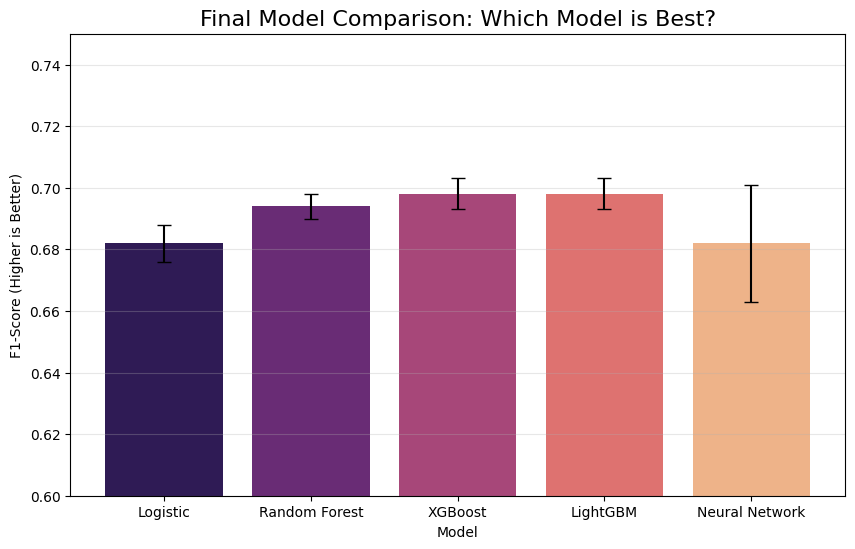

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 1. Putting your real numbers into a table
final_results = pd.DataFrame({
    'Model': ['Logistic', 'Random Forest', 'XGBoost', 'LightGBM', 'Neural Network'],
    'Mean_F1': [0.682, 0.694, 0.698, 0.698, 0.682],
    'Std_Dev': [0.006, 0.004, 0.005, 0.005, 0.019]
})

# 2. Creating the bar chart
plt.figure(figsize=(10, 6))
plot = sns.barplot(x='Model', y='Mean_F1', data=final_results, palette='magma')

# 3. Adding the "Stability" whiskers (Error Bars)
plt.errorbar(x=range(len(final_results)), y=final_results['Mean_F1'], 
             yerr=final_results['Std_Dev'], fmt='none', c='black', capsize=5)

# 4. Making it look professional
plt.title('Final Model Comparison: Which Model is Best?', fontsize=16)
plt.ylabel('F1-Score (Higher is Better)')
plt.ylim(0.60, 0.75) # Zooming in so we can see the differences clearly
plt.grid(axis='y', alpha=0.3)

plt.show()

In [45]:
import joblib

# 1. Save the Model
joblib.dump(best_lgbm, 'best_fraud_model.pkl')

# 2. Save the Test Data (so we can explain the exact same rows)
X_test.to_csv('X_test_for_shap.csv', index=False)
y_test.to_csv('y_test_for_shap.csv', index=False)

print("Files exported! You are ready for Task 3.")

Files exported! You are ready for Task 3.
